# EDA Rooms data

To explore all the 81 collumns of this dataframe, the NEO team decided to split the EDA in 3 notebooks: 1- EDA of Structural Data 2- EDA of Rooms data 3- EDA of Mix Data (data that's not about Structural and Rooms data).

The rooms data is composed of 24 categories, which are listed below:

In [1]:
rooms_columns = ['BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1','BsmtFinSF2',
                'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BmstQual',
                'BsmtUnfSF', 'FullBath', 'GarageArea', 'GarageCars', 'GarageCond',
                'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'HalfBath',
                 'KitchenAbvGr', 'KitchenQual', 'TotalBmstSF', 'TotRmsAbvGrd']

## Missing data

The first code used to look for missing data had the objective of finding "NaN" values on the dataframe columns:

In [10]:
import pandas as pd

df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')

print(len(df) - df.count())

Id               0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
SalePrice        0
dtype: int64


Analysing the output above, it is possible to see missing data on basement and garage related categories. The reason for this is that some of the houses sold don't have basements or garage.

# #Target and predictor variables relation

After searching for missing data, the next step taken was to find a relation between the target variable (SalePrice) and the predictor variables.
First of all, a correlation heatmap was plotted, using the following code:

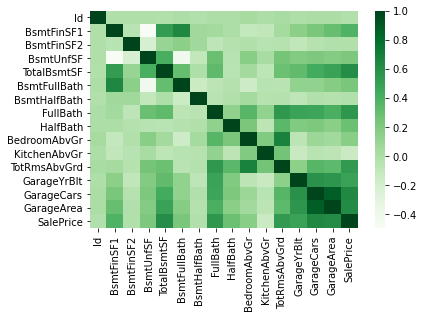

In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')
corrMatrix = df.corr()
sn.heatmap(corrMatrix, cmap='Greens')
plt.show()

The algorithm only displayed the quantitative variables of the dataset, as it wasn't able to order the string categories in the qualitative categories. Because of that, this analysis couldn't give us any valuable information.

Afterwards, the predictor variables were divided as continuous variables and discrete variables. By doing this, it became much easier to find a viable way to look at the data.
The analysis done with the continuous variables was a scatter plot, with the x axis being the predictor variable and the y axis being the SalePrice. The following code was used for this plot, using as an example the "BsmtFinSF1" variable:

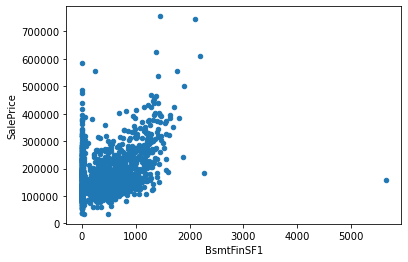

In [11]:
df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')
df.plot.scatter(x='BsmtFinSF1', y='SalePrice')
plt.show()

In this example, we can see that the great majority of the ocurrences have similar values in the "BsmtFinSF1" category, with only very few outliers. At a first look, the variable doesn't seem to influence the target variable very much. One thing that can be done to possibilitate a better analysis of this variable is to exlude these outliers.

The "GarageArea" is another example of a continuous variable analysed in the same way:

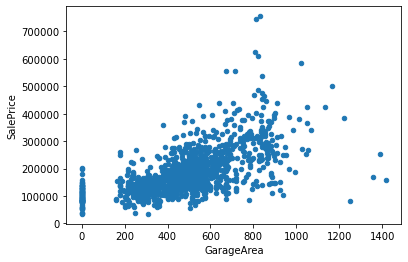

In [12]:
df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')
df.plot.scatter(x='GarageArea', y='SalePrice')
plt.show()

As it can be seen, the "GarageArea" variable has less outliers than the "BsmtFinSF1" one, but it doesn't seem to affect the target variable considerably either.

For the discrete variables, a bar plot was used to analyze their influence in the target variables. The x axis has the predictor variable categories and the y axis has the sale price average for each of these categories. The example below shows the code used for it with the "BsmtFullBath" variable on the y axis:

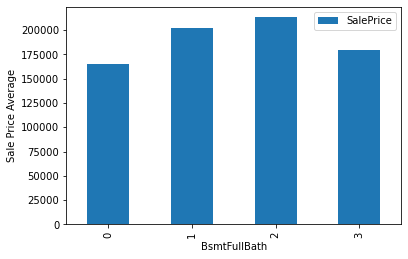

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')
avg = df.groupby('BsmtFullBath').mean()
avg.plot.bar(y='SalePrice')
plt.xlabel('BsmtFullBath')
plt.ylabel('Sale Price Average')
plt.show()

As it can be seen, the price increases as the basement bathrooms also increase, except for the category of 3 bathrooms. We can use the method() function for a better understanding of this behavior:

In [6]:
print(df.groupby('BsmtFullBath')['SalePrice'].describe())

              count           mean           std       min       25%  \
BsmtFullBath                                                           
0             856.0  165521.640187  68137.819610   34900.0  120500.0   
1             588.0  202522.918367  88895.866415   35311.0  140000.0   
2              15.0  213063.066667  87308.196346  108959.0  147950.0   
3               1.0  179000.000000           NaN  179000.0  179000.0   

                   50%       75%       max  
BsmtFullBath                                
0             154150.0  192500.0  755000.0  
1             178800.0  242250.0  745000.0  
2             188000.0  244475.0  385000.0  
3             179000.0  179000.0  179000.0  


As the describe() method showed us, the number of ocurrences of the categories "2" and especially "3" are very lower than the ocurrences of "0" and "1". Other fact that can be seen is that the average of the categories "1" and "2" are quite close, as their standard deviation also is. Because of that, we can try to replace the categories "1", "2" and "3" for "1+" and describe it again to see the result:

In [8]:
df['BsmtFullBath'].replace([1, 2, 3], '1+', inplace=True)
print(df.groupby('BsmtFullBath')['SalePrice'].describe())

              count           mean           std      min       25%       50%  \
BsmtFullBath                                                                    
0             856.0  165521.640187  68137.819610  34900.0  120500.0  154150.0   
1+            604.0  202745.731788  88732.186189  35311.0  140000.0  179100.0   

                   75%       max  
BsmtFullBath                      
0             192500.0  755000.0  
1+            242250.0  745000.0  


The describe() method shows that the average SalePrice and the standard deviation barely changed. The quartiles also remained very similar. Thus, we can conclude that if we keep this merging, the set will probably have a better performance when trained.

Another example with the same analysis is the "BsmtFinType1" category. First of all, let's show a bar plot of it:

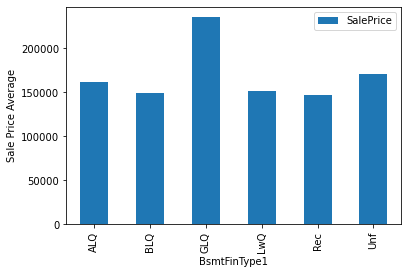

In [9]:
avg = df.groupby('BsmtFinType1').mean()
avg.plot.bar(y='SalePrice')
plt.xlabel('BsmtFinType1')
plt.ylabel('Sale Price Average')
plt.show()

The "GLQ" (Good Living Quarters) category is clearly higher than the other ones, which have a similar average. Analysing the describe() method of the variable:

In [11]:
print(df.groupby('BsmtFinType1')['SalePrice'].describe())

              count           mean           std      min       25%       50%  \
BsmtFinType1                                                                    
ALQ           220.0  161573.068182  50821.277231  81000.0  129000.0  149250.0   
BLQ           148.0  149493.655405  47327.292126  35311.0  122750.0  139100.0   
GLQ           418.0  235413.720096  93215.613258  80000.0  173125.0  213750.0   
LwQ            74.0  151852.702703  50796.987083  75500.0  119000.0  139000.0   
Rec           133.0  146889.248120  45190.118879  34900.0  123000.0  142000.0   
Unf           430.0  170670.576744  72577.080129  37900.0  118100.0  161750.0   

                    75%       max  
BsmtFinType1                       
ALQ           179925.00  538000.0  
BLQ           163100.00  359100.0  
GLQ           277375.00  755000.0  
LwQ           179125.00  301000.0  
Rec           161500.00  381000.0  
Unf           202623.75  582933.0  


As we can see, the three categories with least ocurrences have similar averages and standard deviations. Using the replace method on "BsmtFinType1" for these categories and analysing the describe() output:

In [12]:
df['BsmtFinType1'].replace(['BLQ', 'LwQ', 'Rec'], 'Others', inplace=True)
print(df.groupby('BsmtFinType1')['SalePrice'].describe())

              count           mean           std      min       25%       50%  \
BsmtFinType1                                                                    
ALQ           220.0  161573.068182  50821.277231  81000.0  129000.0  149250.0   
GLQ           418.0  235413.720096  93215.613258  80000.0  173125.0  213750.0   
Others        355.0  149009.664789  47192.951029  34900.0  122000.0  140000.0   
Unf           430.0  170670.576744  72577.080129  37900.0  118100.0  161750.0   

                    75%       max  
BsmtFinType1                       
ALQ           179925.00  538000.0  
GLQ           277375.00  755000.0  
Others        164950.00  381000.0  
Unf           202623.75  582933.0  


After replacing the categories for "Others", it's possible to see that the average SalePrice, standard deviation and quartiles of the new category are very similar to those of the "BLQ" category, the category with most occurrences between those that were replaced. Therefore, we can keep this replacement to improve the performance of the future train model.

Similar analysis were made with all 24 categories related to rooms. In order to keep this notebook objective, these are the main insights collected by them:

- Rooms quality seem to be the categories that influence the target variable the most;
- When the variable categories are qualitative grades (Ex, Gd, TA, Fa, Po), the TA (Typical/Average) category usually has the majority of the occurences;
- Basement and garage areas don't seem to have a logical relation with the target variable;
- BsmtQual, GarageFinish, GarageQual, KitchenQual, TotRmsAbvGrd, HalfBath and BedroomAbvGr are the predictor variables that seem to influence the target variable the most.

Furthermore, these are the predictor variables that seemed to have categories that could be merged:

- BsmtQual: "TA" and "Fa" were replaced by "TA/Fa";
- BsmtCond: "Fa" and "Po" were replaced by "Below Average";
- BsmtExposure: "Av and "Mn" were replaced by "Av/Mn";
- BsmtFinType1: "BLQ", "LwQ" and "Rec" were replaced by "Others";
- BsmtFinType2: "BLQ", "LwQ" and "Rec" were replaced by "Others";
- BsmtFullBath: 1, 2 and 3 were replaced by 1+;
- GarageQual: "Ex", "Gd" and "TA" were replaced by "Average/Above Average" and "Fa" and "Po" were replaced by "Below Average";
- GarageType: "2Types", "Basment" and "CarPort" were replaced by "Others";
- KitchenQual: "TA" and "Fa" were replaced by "TA/Fa";
- BedroomAbvGr: 5, 6 and 8 were replaced by "5+";
- TotRmsAbvGrd: 2, 3 and 4 were replaced by "4-" and 10, 11, 12 and 14 were replaced by "10+";
- FullBath: 0 and 1 were replaced by "0/1".

In [22]:
print(df.groupby('FullBath')['SalePrice'].describe())

          count           mean           std      min       25%       50%  \
FullBath                                                                    
0-1       659.0  135167.289833  43050.642397  34900.0  111625.0  132500.0   
2/3       801.0  218563.922597  82718.206084  55000.0  170000.0  200000.0   

               75%       max  
FullBath                      
0-1       151000.0  423000.0  
2/3       252000.0  755000.0  


The only predictor variable on which it was decided to use a different plot is "GarageYrBlt". For this variable, the analysis was made with the help of a line plot:

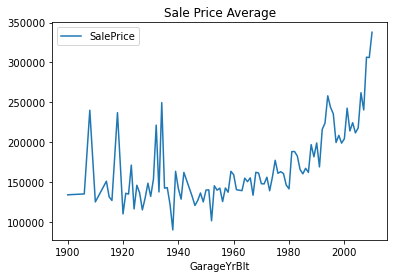

In [23]:
    df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/rooms.csv')
    avg = df.groupby('GarageYrBlt').mean()
    avg.plot.line(y='SalePrice')
    plt.title('Sale Price Average')
    plt.show()

As it can be seen, the target variable averages oscilate very much. However, after 1940, a certain growth pattern in the target variable can be identified as the predictor variable increases, but it was not enough to reach a satisfying conclusion about its influence on it.

In [3]:
!jupyter nbconvert --to script 1.0-vse-eda-rooms.ipynb --TemplateExporter.exclude_input_prompt=True

[NbConvertApp] Converting notebook 1.0-vse-eda-rooms.ipynb to script
[NbConvertApp] Writing 8406 bytes to 1.0-vse-eda-rooms.py
